In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
import xgboost
import warnings
warnings.filterwarnings('ignore')


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [67]:
data = pd.read_csv('fraudTrain.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [68]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
ds = data.copy()
ds.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [69]:
ds['new_unix_time'] = ds['trans_date_trans_time'].apply(lambda x: pd.Timestamp(x).timestamp())
ds.head()
 

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,new_unix_time
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1.546301e+09
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1.546301e+09
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1.546301e+09
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1.546301e+09
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1.546301e+09


In [70]:
ds.drop('trans_date_trans_time', axis = 1, inplace = True)
ds.drop('unix_time', axis = 1, inplace = True)
ds.head()


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,new_unix_time
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,1.546301e+09
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,1.546301e+09
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,1.546301e+09
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,1.546301e+09
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,1.546301e+09


In [41]:
ds.isnull().sum()

cc_num           0
merchant         0
category         0
amt              0
first            0
last             0
gender           0
street           0
city             0
state            0
zip              0
lat              0
long             0
city_pop         0
job              0
dob              0
trans_num        0
merch_lat        0
merch_long       0
is_fraud         0
new_unix_time    0
dtype: int64

In [42]:
cat = ds.select_dtypes(exclude = 'number')
num = ds.select_dtypes(include = 'number')

print('Categorical Dataset')
display(cat.head())
print(f'\n\nNumerical Dataset')
display(num.head())

Categorical Dataset


,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46




Numerical Dataset


,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,new_unix_time
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,1.546301e+09
1,630423337322,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,1.546301e+09
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0,1.546301e+09
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0,1.546301e+09
4,375534208663984,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,0,1.546301e+09


In [43]:
num.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,new_unix_time
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03,1.570107e+09
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02,1.285545e+07
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00,1.546301e+09
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00,1.559589e+09
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00,1.570088e+09
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00,1.580224e+09
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00,1.592742e+09


In [71]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
encoded = {}

for i in cat:
    encoder = LabelEncoder()
    ds[i] = encoder.fit_transform(ds[i])
    encoded[i + '_encoder'] = encoder
    joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))

encoded

{'merchant_encoder': LabelEncoder(),
 'category_encoder': LabelEncoder(),
 'first_encoder': LabelEncoder(),
 'last_encoder': LabelEncoder(),
 'gender_encoder': LabelEncoder(),
 'street_encoder': LabelEncoder(),
 'city_encoder': LabelEncoder(),
 'state_encoder': LabelEncoder(),
 'job_encoder': LabelEncoder(),
 'dob_encoder': LabelEncoder(),
 'trans_num_encoder': LabelEncoder()}

In [72]:
#ascertain columns that needs scaling
columns_to_scale = []
for i in num:
    if ds[i].describe()[2] > 1500:
        columns_to_scale.append(i)
        print(f'{i}: {ds[i].describe()[2]}')

cc_num: 1.3088064470002404e+18
zip: 26893.2224764859
city_pop: 301956.360688751
new_unix_time: 12855448.282256063


In [73]:
#scale the numerical columns
from sklearn.preprocessing import StandardScaler
import joblib
scaled = {}

for i in columns_to_scale:
    scaler = StandardScaler()
    ds[i] = scaler.fit_transform(ds[[i]])
    joblib.dump(scaler, open(f'{i}_scaler.pkl', 'wb')) 
    scaled[i + '_scaled'] = scaler

scaled

{'cc_num_scaled': StandardScaler(),
 'zip_scaled': StandardScaler(),
 'city_pop_scaled': StandardScaler(),
 'new_unix_time_scaled': StandardScaler()}

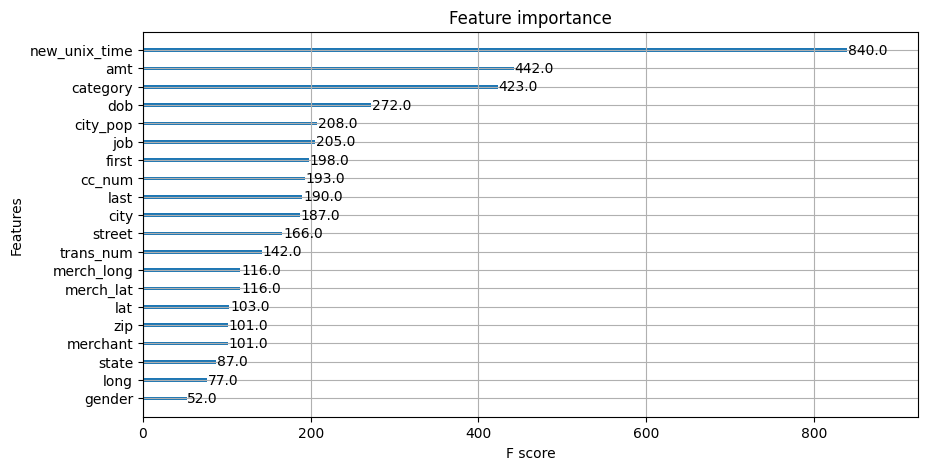

In [47]:
#feature selection
import matplotlib.pyplot as plt
import xgboost as xgb
model = xgb.XGBClassifier()


x = ds.drop('is_fraud', axis = 1)
y = ds.is_fraud

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [54]:
ds.columns

Index(['new_unix_time', 'amt', 'category', 'cc_num', 'last', 'city',
       'is_fraud'],
      dtype='object')

In [74]:
sel_cols = ['new_unix_time', 'amt', 'category', 'state', 'merchant', 'merch_long', 'merch_lat', 'is_fraud' ]
dx = ds[sel_cols]
dx.head()

,new_unix_time,amt,category,state,merchant,merch_long,merch_lat,is_fraud
0,-1.851825,4.97,8,27,514,-82.048315,36.011293,0
1,-1.851823,107.23,4,47,241,-118.186462,49.159047,0
2,-1.851822,220.11,0,13,390,-112.154481,43.150704,0
3,-1.851820,45.00,2,26,360,-112.561071,47.034331,0
4,-1.851812,41.96,9,45,297,-78.632459,38.674999,0


<Axes: xlabel='is_fraud', ylabel='count'>

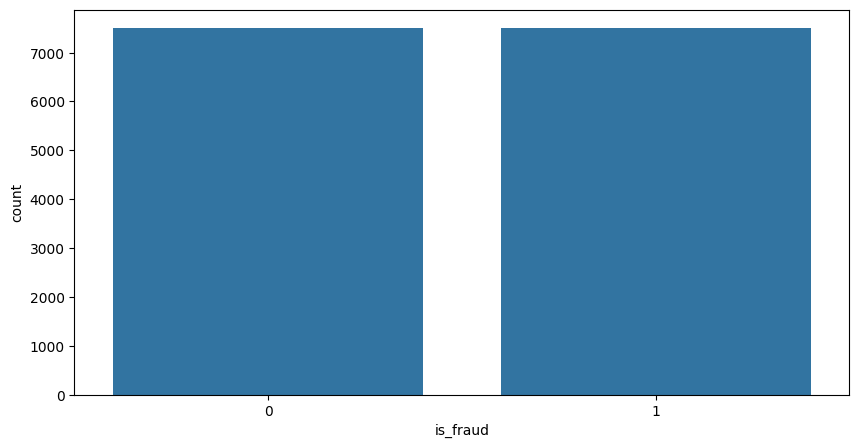

In [75]:
class_0 = dx.loc[dx['is_fraud'] == 0]
class_1 = dx.loc[dx['is_fraud'] == 1]

new_class_0 = class_0.sample(7500)

new_data = pd.concat([class_1, new_class_0], axis = 0)
(new_data.head())

sns.countplot(x = new_data['is_fraud'])

In [76]:
new_data

,new_unix_time,amt,category,state,merchant,merch_long,merch_lat,is_fraud
2449,-1.844794,281.06,4,27,543,-81.179483,36.430124,1
2472,-1.844604,11.52,2,43,285,-99.142791,29.819364,1
2523,-1.844240,276.31,4,43,196,-98.836360,29.273085,1
2546,-1.844088,7.03,2,27,162,-82.091010,35.909292,1
2553,-1.844005,275.73,4,43,328,-98.683410,29.786426,1
...,...,...,...,...,...,...,...,...
500043,-0.397235,32.17,9,25,414,-91.695109,32.818971,0
1269124,1.692201,86.53,11,28,594,-96.885755,45.961717,0
47875,-1.663639,86.43,11,5,557,-104.919107,40.747326,0
23556,-1.759013,44.80,6,2,581,-93.844549,33.621753,0


In [77]:
x = new_data.drop('is_fraud', axis = 1)
y = new_data.is_fraud

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8, stratify = y, random_state = 50)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier()


rf_model.fit(xtrain, ytrain)

# Model Evaluation
cross_validation = rf_model.predict(xtrain) 
print(classification_report(cross_validation, ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6004

    accuracy                           1.00     12004
   macro avg       1.00      1.00      1.00     12004
weighted avg       1.00      1.00      1.00     12004



In [83]:
# Model Evaluation
cross_validation = rf_model.predict(xtest) 
print(classification_report(cross_validation, ytest))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1523
           1       0.94      0.96      0.95      1479

    accuracy                           0.95      3002
   macro avg       0.95      0.95      0.95      3002
weighted avg       0.95      0.95      0.95      3002



In [84]:
joblib.dump(rf_model, open('fraudDetectionModel.pkl', 'wb'))